<h1 font-size="60px" font-family="Open Sans" color="black"> AirBnb Data in the Sydney, Melbourne and Tasmania regions </h1>

<br>
<img src="https://media.timeout.com/images/105192960/image.jpg" width="500" text-align="left" />

<h5> By Oscar Liang </h5>
<p>zID: z5363102, Github: @MightyEagle073</p>

<h1> Some crucial commands that needs to be done before this presentation </h1>

In [215]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime
%matplotlib inline
sydcsv = pd.read_csv("listings_syd.csv")
melcsv = pd.read_csv("listings_mel.csv")
tascsv = pd.read_csv("listings_tas.csv")
sydpop = 5300000
melpop = 5070000
taspop = 540000

<h1 font-size="40px" font-family="Open Sans" > How many listings are in each region? </h1>

<h3>Total number in Sydney</h3>

In [216]:
len(sydcsv)

20632

<h3>Total number in Melbourne</h3>

In [217]:
len(melcsv)

17551

<h3>Total number in Tasmania</h3>

In [218]:
len(tascsv)

5036

<h1>Density of Regions</h1>

<h3>Density in Sydney</h3>
<p>20,632 listings and 5,300,000 population</p>

In [219]:
sydpop/len(sydcsv)

256.8825126017836

<h3>Density in Melbourne</h3>
<p>15,771 listings and 5,070,000 population</p>

In [220]:
melpop/len(melcsv)

288.872428921429

<h3>Density in Tasmania</h3>
<p>5,036 listings, 540,000 population</p>

In [221]:
taspop/len(tascsv)

107.22795869737887

<h1>Where are the listings located at?</h1>

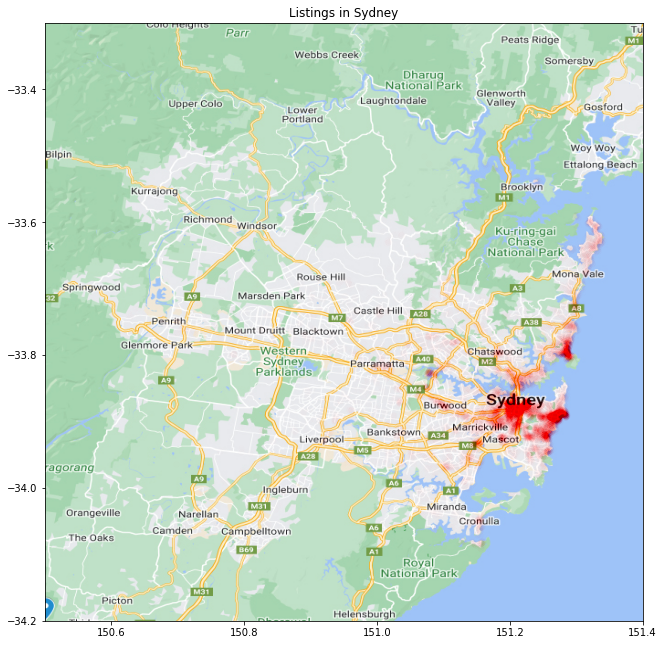

In [52]:
plt.rcParams['figure.figsize'] = [11, 11]
plt.plot(sydcsv.longitude, sydcsv.latitude, 'o', color='red', alpha=0.002)
plt.title("Listings in Sydney")
implot = plt.imshow(plt.imread("slide3a.jpg"), extent=[150.5,151.4,-34.2,-33.3])

Text(0.5, 1.0, 'Listings in Melbourne')

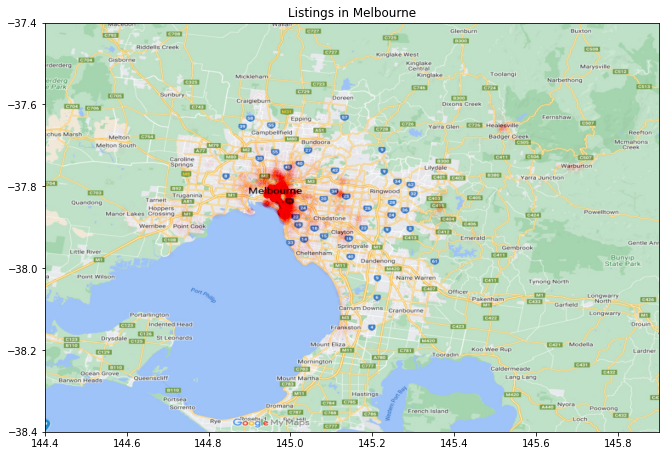

In [55]:
implot = plt.imshow(plt.imread("slide3b.jpg"), extent=[144.4,145.9,-38.4,-37.4])
plt.rcParams['figure.figsize'] = [11, 11]
plt.plot(melcsv.longitude, melcsv.latitude, 'o', color='red', alpha=0.002)
plt.title("Listings in Melbourne")

Text(0.5, 1.0, 'Listings in Tasmania')

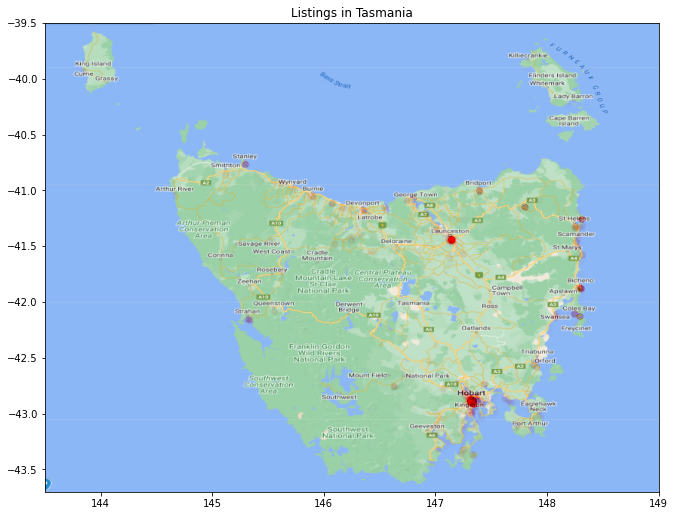

In [57]:
implot = plt.imshow(plt.imread("slide3c.jpg"), extent=[143.5,149,-43.7,-39.5])
plt.rcParams['figure.figsize'] = [11, 11]
plt.plot(tascsv.longitude, tascsv.latitude, 'o', color='red', alpha=0.002)
plt.title("Listings in Tasmania")

<h1>Price distribution of listings</h1>

In [225]:
def pricedist(dataset, binsno, lowest, highest):
    prices = []
    prices_mean = 0
    for i in dataset.price:
        prices.append(int(i[1:-3].replace(",","")))
    for i in prices:
        prices_mean += i/len(prices)
    if highest == 0:
        plt.hist(prices, bins=binsno) 
    else:
        plt.hist(prices, bins=binsno, range=(lowest,highest))
    plt.xlabel("Price")
    plt.ylabel("Number")
    plt.title("Price Distribution in this region")
    print("Mean price is $" + str(round(prices_mean, 2)))
    print("Lowest price is $" + str(min(prices)))
    print("Highest price is $" + str(max(prices)))

Mean price is $255.22
Lowest price is $13
Highest price is $28613


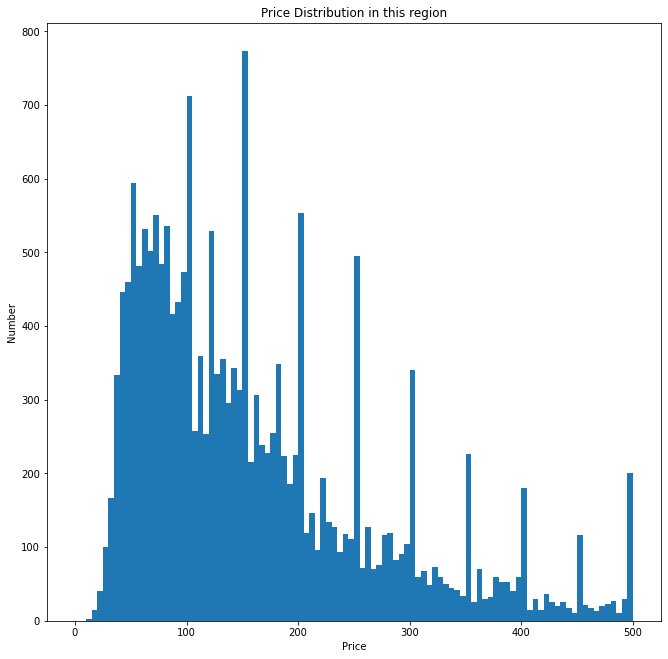

In [59]:
pricedist(sydcsv,100,0,500)

<h1>Types of rooms in each region</h1>

In [227]:
def roomtypes(dataset):
    plt.rcParams['figure.figsize'] = [11, 11]
    counts = dataset.room_type.value_counts()
    counts.plot(kind="pie", autopct='%1.1f%%')
    # plt.hist(dataset.room_type)
    prices = []
    for i in dataset.price:
        prices.append(int(i[1:-3].replace(",","")))
    for i in range(len(counts.index.tolist())):
        prices_mean = 0
        for j in range(len(dataset)):
            if dataset.room_type[j] == counts.index.tolist()[i]:
                prices.append(prices[j])
                prices_mean += prices[j]/int(counts[i])
        print("Average price in " + str(counts.index.tolist()[i]) + " is $" + str(round((prices_mean),2)))

Average price in Entire home/apt is $331.31
Average price in Private room is $109.2
Average price in Shared room is $67.31
Average price in Hotel room is $266.58


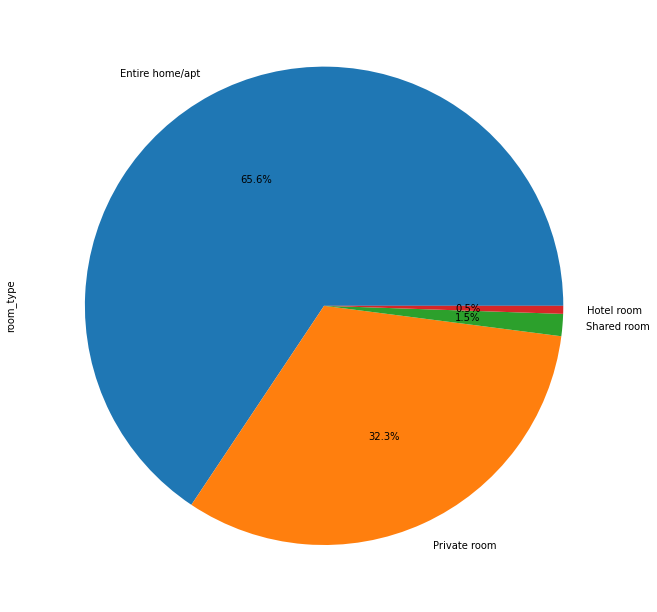

In [60]:
roomtypes(sydcsv)

<h1>Does price correlate with number of guests accomodated?</h1>

In [229]:
def guests1(dataset, max):
    prices = []
    pricesunderx = []
    accommodatesunderx = []
    for i in dataset.price:
        prices.append(int(i[1:-3].replace(",","")))
    for i in range(len(prices)):
        if prices[i] < max or max == 0:
            # print([str(prices[i]) + "," + str(dataset.guests[i])])
            pricesunderx.append(prices[i])
            accommodatesunderx.append(dataset.accommodates[i])
    plt.plot(pricesunderx, accommodatesunderx, 'o', color='red', alpha=0.2)
    plt.xlabel("Price")
    plt.ylabel("Guests")

def guests2(dataset, increment, rounds, ifprint):
    prices = []
    pricerange = []
    accommodatesrange = []
    accommodatesplotx = []
    accommodatesploty = []
    pricetocheckfrom = 1
    for i in dataset.price:
        prices.append(int(i[1:-3].replace(",","")))
    for i in range(rounds):
        accommodatesmean = 0
        for j in range(len(prices)):
            if prices[j] >= pricetocheckfrom and prices[j] <= pricetocheckfrom + increment - 1:
                pricerange.append(prices[j])
                accommodatesrange.append(dataset.accommodates[j])
        for j in range(len(accommodatesrange)):
            accommodatesmean += accommodatesrange[j]/len(accommodatesrange)
        if ifprint == 1:
            print("For Airbnbs between $" + str(pricetocheckfrom) + " to $" + str(pricetocheckfrom + increment - 1) + ", the average guests that airbnb can accommodate is " + str(accommodatesmean) + " people.")
        pricetocheckfrom = pricetocheckfrom + increment
        accommodatesploty.append([pricetocheckfrom - 1])
        accommodatesplotx.append(accommodatesmean)
    if not ifprint:
        plt.plot(accommodatesploty, accommodatesplotx)
        plt.xlabel("Price")
        plt.ylabel("Number of Guests Accommodated")
    

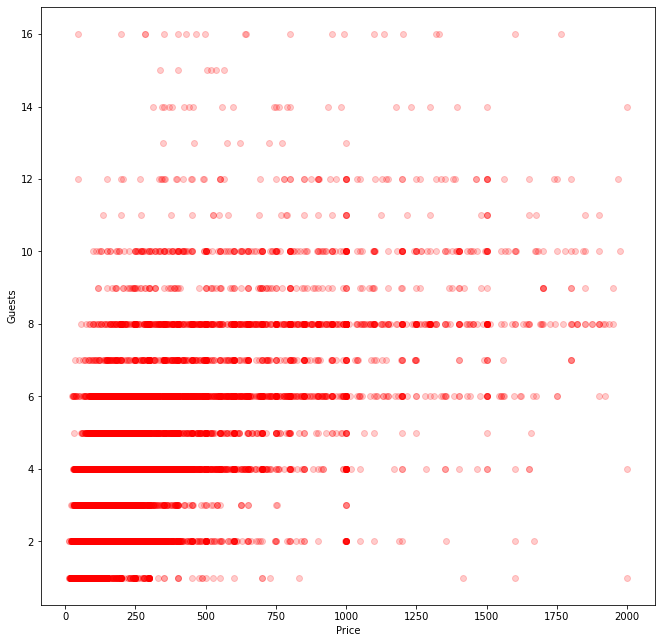

In [230]:
guests1(sydcsv, 2000)

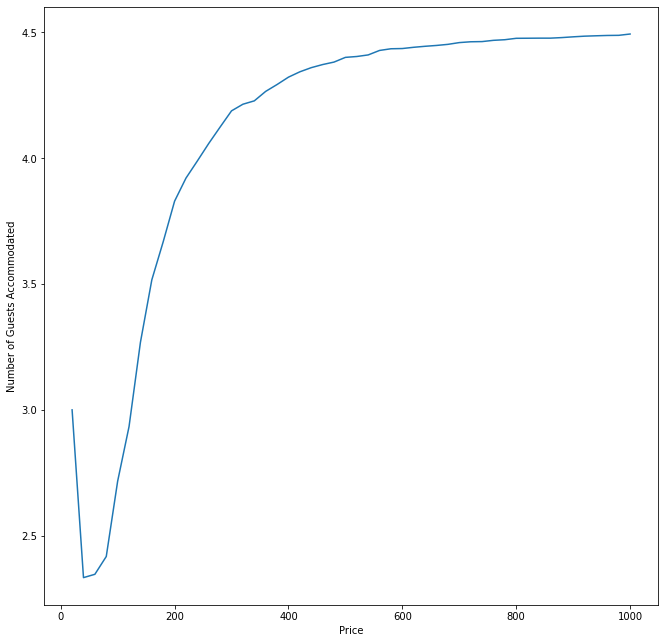

In [62]:
guests2(tascsv, 20, 50, False)

<h1>Does price correlate with number of amenities?</h1>

In [232]:
def amenities1(dataset, max):
    prices = []
    pricesunderx = []
    amenitiesunderx = []
    for i in dataset.price:
        prices.append(int(i[1:-3].replace(",","")))
    for i in range(len(prices)):
        if prices[i] < max or max == 0:
            # print([str(prices[i]) + "," + str(dataset.amenities[i])])
            pricesunderx.append(prices[i])
            amenitiesunderx.append(dataset.amenities[i].count(",") + 1)
    plt.plot(pricesunderx, amenitiesunderx, 'o', color='red', alpha=0.2)
    plt.xlabel("Price")
    plt.ylabel("amenities")

def amenities2(dataset, increment, rounds, ifprint):
    prices = []
    pricerange = []
    amenitiesrange = []
    amenitiesplotx = []
    amenitiesploty = []
    pricetocheckfrom = 1
    for i in dataset.price:
        prices.append(int(i[1:-3].replace(",","")))
    for i in range(rounds):
        amenitiesmean = 0
        for j in range(len(prices)):
            if prices[j] >= pricetocheckfrom and prices[j] <= pricetocheckfrom + increment - 1:
                pricerange.append(prices[j])
                amenitiesrange.append(dataset.amenities[j].count(",") + 1)
        for j in range(len(amenitiesrange)):
            amenitiesmean += amenitiesrange[j]/len(amenitiesrange)
        if ifprint:
            print("For Airbnbs between $" + str(pricetocheckfrom) + " to $" + str(pricetocheckfrom + increment - 1) + ", the average amenities that airbnb provides is " + str(amenitiesmean) + " amenities.")
        pricetocheckfrom = pricetocheckfrom + increment
        amenitiesplotx.append([pricetocheckfrom - 1])
        amenitiesploty.append(amenitiesmean)
    if not ifprint:
        plt.plot(amenitiesplotx, amenitiesploty)
        plt.xlabel("Price")
        plt.ylabel("Number of Amenities Included")

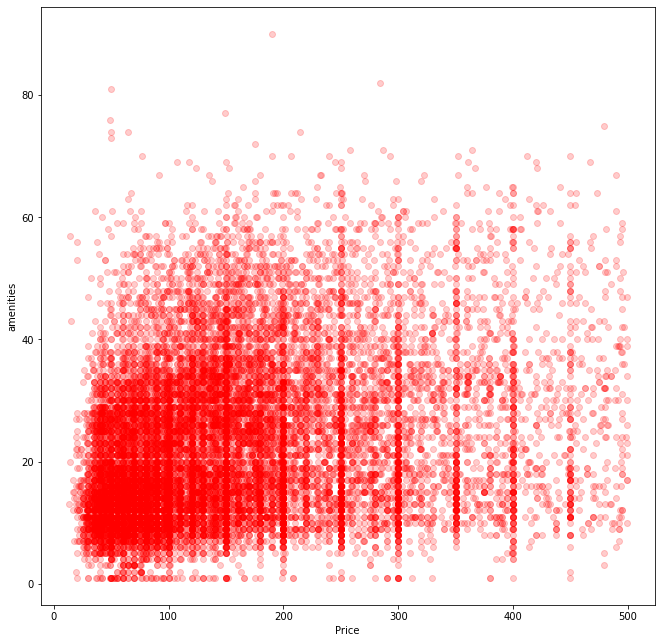

In [233]:
amenities1(sydcsv, 500)

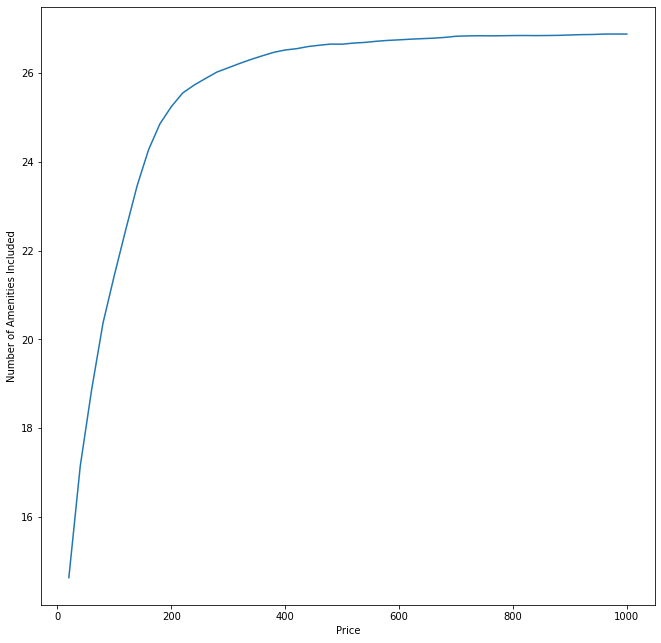

In [64]:
amenities2(melcsv, 20, 50, False)

<h1>Does price correlate with the average rating of the Airbnb?</h1>

In [235]:
def ratings1(dataset, max):
    prices = []
    pricesunderx = []
    ratingsunderx = []
    for i in dataset.price:
        prices.append(int(i[1:-3].replace(",","")))
    for i in range(len(prices)):
        if prices[i] < max or max == 0:
            # print([str(prices[i]) + "," + str(dataset.ratingss[i])])
            pricesunderx.append(prices[i])
            ratingsunderx.append(dataset.review_scores_value[i])
    plt.plot(pricesunderx, ratingsunderx, 'o', color='red', alpha=0.2)
    plt.xlabel("Price")
    plt.ylabel("ratings")

def ratings2(dataset, increment, rounds, ifprint):
    prices = []
    pricerange = []
    ratingsrange = []
    ratingsplotx = []
    ratingsploty = []
    pricetocheckfrom = 1
    for i in dataset.price:
        prices.append(int(i[1:-3].replace(",","")))
    for i in range(rounds):
        ratingsmean = 0
        for j in range(len(prices)):
            if prices[j] >= pricetocheckfrom and prices[j] <= pricetocheckfrom + increment - 1:
                pricerange.append(prices[j])
                ratingsrange.append(dataset.review_scores_value[j])
        for j in range(len(ratingsrange)):
            # print(ratingsrange[j] + 2 == ratingsrange[j] + 1 + 1)
            if ratingsrange[j] + 2 == ratingsrange[j] + 1 + 1:
                ratingsmean += ratingsrange[j]/len(ratingsrange)
            else:
                ratingsmean += ratingsmean * (len(ratingsrange) / j) / len(ratingsrange)
        if ifprint:
            print("For Airbnbs between $" + str(pricetocheckfrom) + " to $" + str(pricetocheckfrom + increment - 1) + ", the average rating that airbnb gets is " + str(ratingsmean) + " stars.")
        pricetocheckfrom = pricetocheckfrom + increment
        ratingsplotx.append([pricetocheckfrom - 1])
        ratingsploty.append(ratingsmean)
    if not ifprint:
        plt.plot(ratingsplotx, ratingsploty)
        plt.xlabel("Price")
        plt.ylabel("Rating of Airbnb")

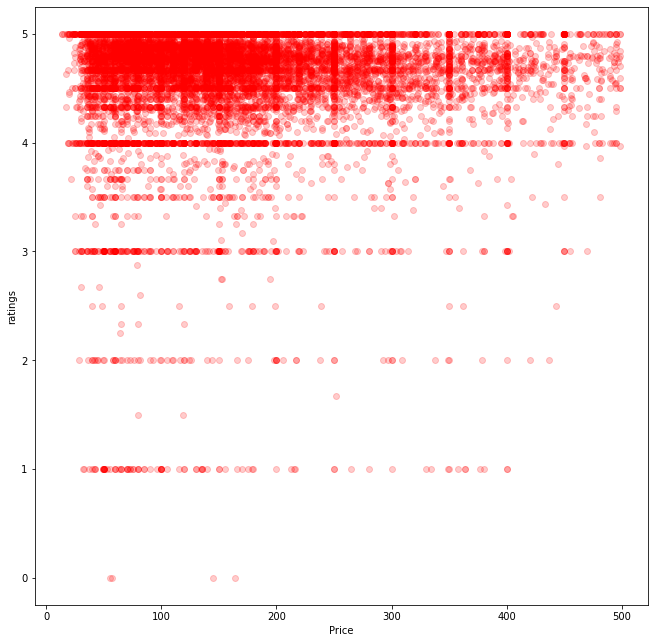

In [236]:
ratings1(sydcsv, 500)

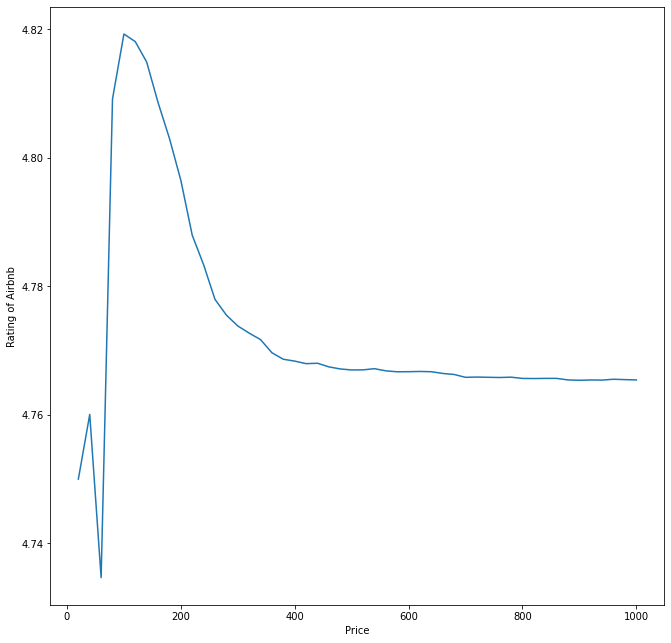

In [67]:
ratings2(tascsv, 20, 50, False)

<h1>That's all!</h1>
<img src="https://media.cntraveler.com/photos/60cb4b446834ea5878d2f288/master/w_1200,h_800,c_limit/airbnb%2031073966.jpg" width="500" text-align="left" />
<p>Thank you for listening, hopefully now you know which Airbnbs to book!</p>